In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # from data visualization
import seaborn as sns # for data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
# Storing the training and test data filepath in a variable for easy access
train_data_filepath='''/kaggle/input/playground-series-s4e1/train.csv'''
test_data_filepath='''/kaggle/input/playground-series-s4e1/test.csv'''

In [3]:
# import the data into pandas dataframe
df_train=pd.read_csv(train_data_filepath)
df_test=pd.read_csv(test_data_filepath)

In [4]:
# let's check the first few rows of the train data
# this will tell us whether the import went through fine and how do the columns look like
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


### Now we will do some data exploration on the different features. At this stage we are taking the call that id, UserId and Surname should not be taken as features. While the choice of id and UserId are easier, including surname as one of the feature is not appropriate on ethical grounds.

### We also note that the Geography and Gender and categorical variables. We may eventually convert them to one hot encoding for creating our predictive models

In [6]:
# let's explore the data first before diving into the modelling part
df_train.shape

(165034, 14)

In [7]:
# checking the different column names
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# getting the onformation about the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


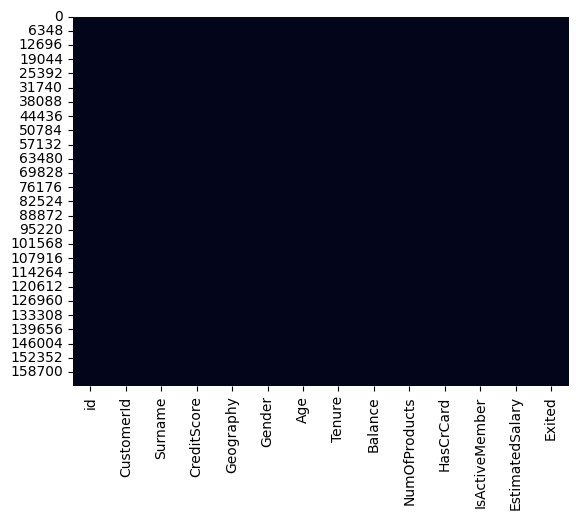

In [9]:
# visualizing null values
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [10]:
# seems like we have no null values. let's do a recheck
null_counts = df_train.isnull().sum()
print(null_counts)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### The data doesn't seem to have a null value

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

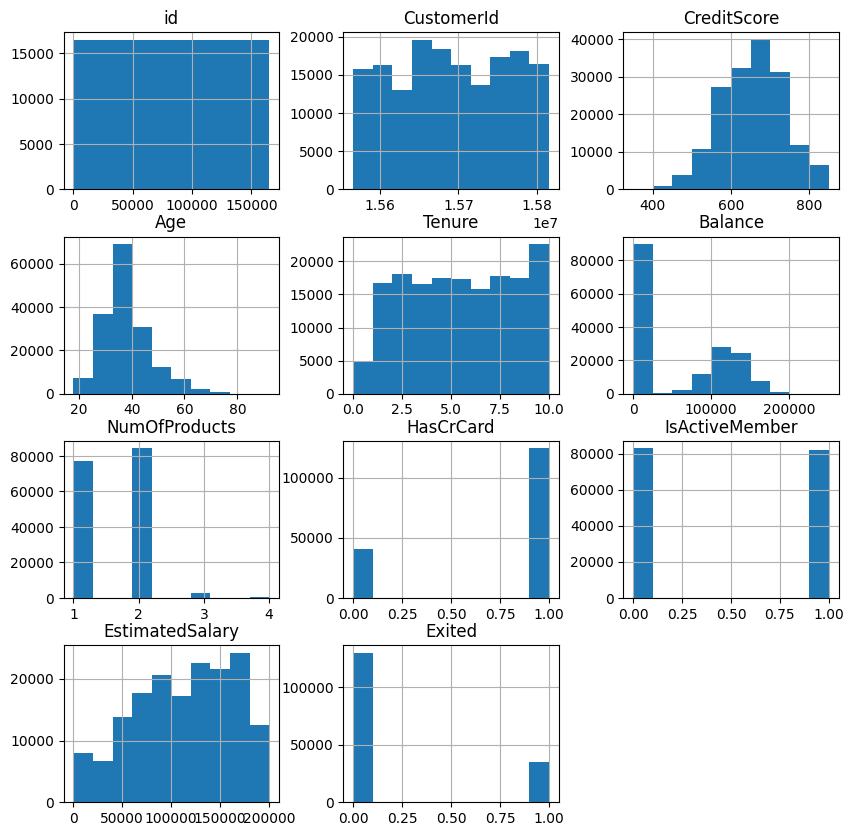

In [11]:
# let's check the distribution of each of the features
df_train.hist(figsize=(10,10))

<Axes: xlabel='Gender', ylabel='count'>

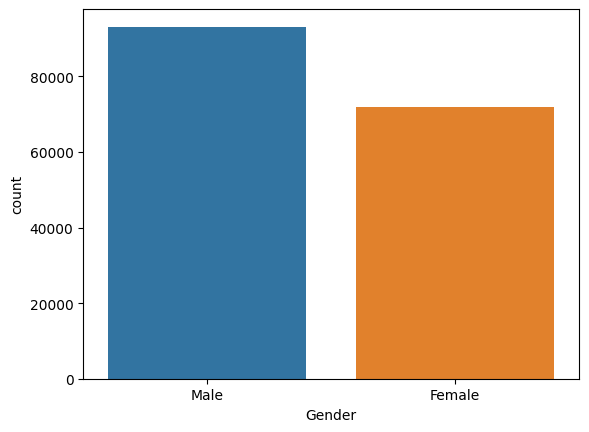

In [12]:
# let's check the categorical variables as well
sns.countplot(x='Gender', data=df_train)

<Axes: xlabel='Geography', ylabel='count'>

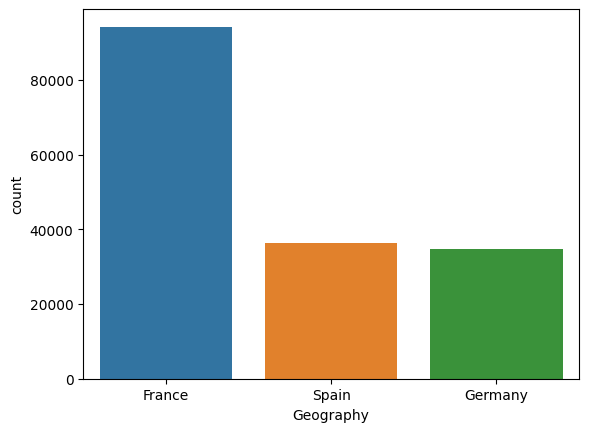

In [13]:
sns.countplot(x="Geography",data=df_train)

### We can see that there is imbalance in the target variable as well as in NumProducts and HasCrCard

In [14]:
df_train["Exited"].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [15]:
df_train["NumOfProducts"].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [16]:
df_train["HasCrCard"].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

### We will use both undersampling and SMOTE methods to reduce the data imbalance

In [17]:
# importing libraries to perform statistical analysis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

### Before proceeding ahead let's create one hot encoding for "Gender" and "Geography"

In [18]:
df_train=pd.get_dummies(df_train,columns=["Gender","Geography"])
df_test=pd.get_dummies(df_test,columns=["Gender","Geography"])

In [19]:
df_train[['Gender_Female', 'Gender_Male','Geography_France', 'Geography_Germany', 'Geography_Spain']]=df_train[['Gender_Female', 'Gender_Male','Geography_France', 'Geography_Germany', 'Geography_Spain']].astype(int)
df_test[['Gender_Female', 'Gender_Male','Geography_France', 'Geography_Germany', 'Geography_Spain']]=df_test[['Gender_Female', 'Gender_Male','Geography_France', 'Geography_Germany', 'Geography_Spain']].astype(int)

In [20]:
X_train = df_train.drop('Exited', axis=1) 
y_train = df_train['Exited']

In [21]:
# X_train=X_train.drop(columns=["id","CustomerId","Surname"])
X=X_train.drop(columns=['id','CustomerId','Surname'])
y=y_train

In [22]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,1,0,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,1,0,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,1,0,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,1,0,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,1,0,0,0,1
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,1,0,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,1,0,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,1,0,0,0,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)

### Lets start modelling

In [24]:
# logistic regression
model_logistic=LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [25]:
# Make predictions
y_probs = model_logistic.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

In [26]:
def AUC(y_test,y_probs):
    auc = roc_auc_score(y_test, y_probs)
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    return auc

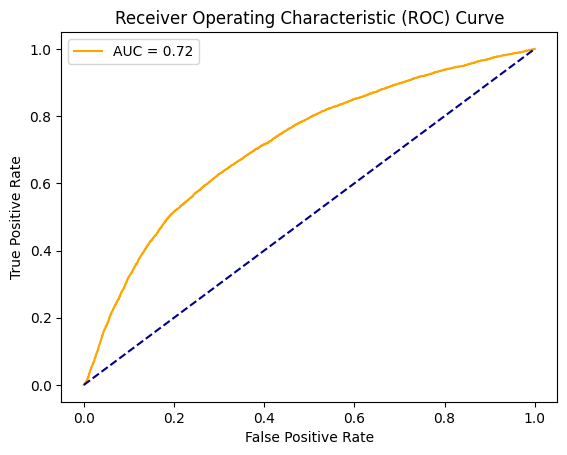

0.7152186976284395

In [27]:
AUC(y_test,y_probs)

In [28]:
# undersample
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=55)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# SMOTE
smote = SMOTE(random_state=55)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [29]:
model_under_sample=model_logistic.fit(X_train_under,y_train_under)
model_smote=model_logistic.fit(X_train_smote,y_train_smote)

In [30]:
# Make predictions
y_probs_under = model_under_sample.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

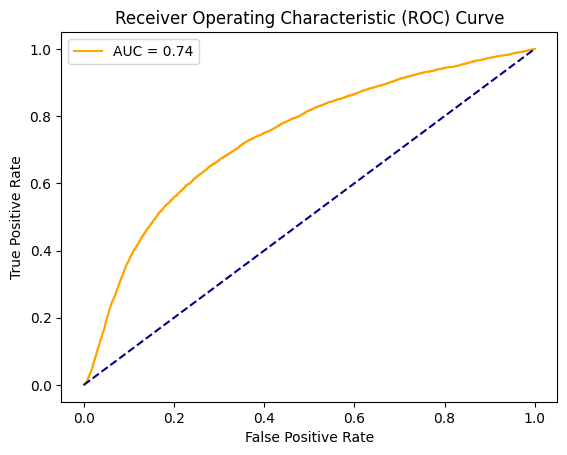

0.737592904532113

In [31]:
AUC(y_test,y_probs_under)

In [32]:
# Make predictions
y_probs_smote = model_smote.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

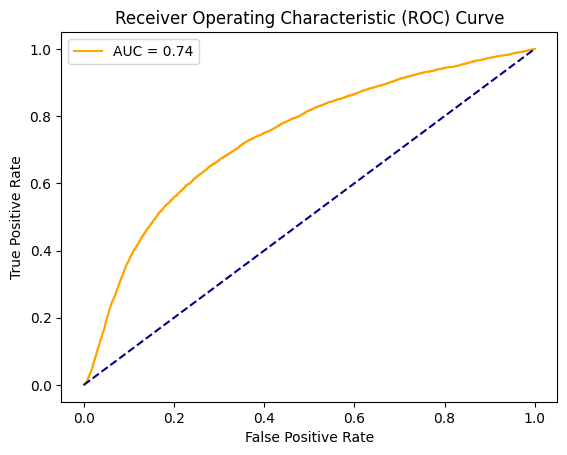

0.737592904532113

In [33]:
AUC(y_test,y_probs_smote)

In [34]:
# before applying a neurall network, let us standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assuming X_train and X_test are your training and testing feature sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[-0.29253656,  0.09749776, -0.00701994, ...,  0.86735196,
        -0.51545446, -0.53015967],
       [ 2.22837099, -1.48194998,  1.06156772, ...,  0.86735196,
        -0.51545446, -0.53015967],
       [-0.65444903, -0.12813763,  0.70537183, ..., -1.1529345 ,
        -0.51545446,  1.88622419],
       ...,
       [ 0.06937591, -0.12813763,  1.4177636 , ...,  0.86735196,
        -0.51545446, -0.53015967],
       [-0.32997578,  1.4513101 , -1.0756076 , ..., -1.1529345 ,
        -0.51545446,  1.88622419],
       [-0.50469215, -0.57940841,  0.70537183, ..., -1.1529345 ,
         1.94003558, -0.53015967]])

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 12)
        self.fc2 = nn.Linear(12, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

net = Net()

In [38]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

In [39]:
y_probs = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = net(inputs)
        y_probs.extend(outputs.squeeze().numpy())

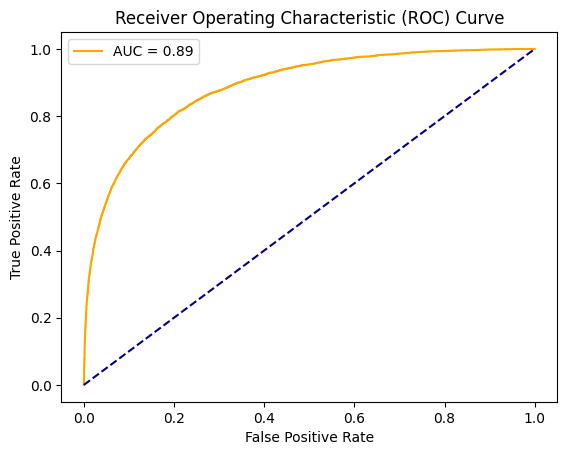

0.886859318629009

In [40]:
AUC(y_test,y_probs)

In [41]:
X_train_tensor.shape

torch.Size([132027, 13])